# Boston House Price Predictions

_______

## Data Preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl
%matplotlib inline
sns.set()
plt.style.use('ggplot')

In [2]:
# Loading the pkl file of Boston Hosue Prices
boston = pkl.load(open('boston_housing.pkl','rb'))

In [3]:
type(boston)

sklearn.utils.Bunch

In [4]:
# keys of the boston dictionary
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
#printing the description
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
# Checking the features
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

Description about the features:

- CRIM     per capita crime rate by town
- ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS    proportion of non-retail business acres per town
- CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX      nitric oxides concentration (parts per 10 million)
- RM       average number of rooms per dwelling
- AGE      proportion of owner-occupied units built prior to 1940
- DIS      weighted distances to five Boston employment centres
- RAD      index of accessibility to radial highways
- TAX      full-value property-tax rate per $10,000
- PTRATIO  pupil-teacher ratio by town
- B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT    % lower status of the population

Median Value (attribute 14) is usually the target.

In [7]:
# Loading the data
data = boston.data

In [8]:
data.shape

(506, 13)

In [9]:
data = pd.DataFrame(data=data, columns = boston.feature_names)

In [10]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
# Adding the target variable
data['Price'] = boston.target

In [12]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Data Exploration

In [13]:
# Checking for null values
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

We can see that there are no missing values in our data.

In [14]:
# Checking for duplicated values
data.duplicated().sum()

0

Hence there are no duplicate values in our dataset

In [15]:
# Information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.4 KB


We can se that even when CHAS is a categorical variable our dataset is showing it as a numerical variable so we will have to convert it into a categorical format.

In [16]:
#Description of the data
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [17]:
# Grabbing the mean of each attribute
data_desc = data.describe()
data_desc.loc['mean']

CRIM         3.613524
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
Price       22.532806
Name: mean, dtype: float64

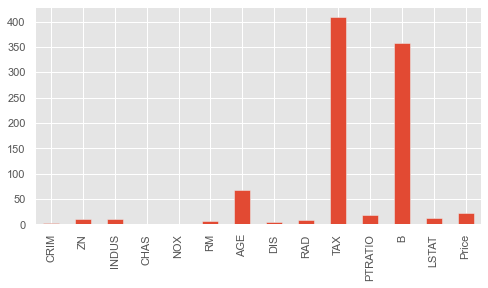

In [18]:
# Plotting the mean of all the attributes
plt.figure(figsize=(8,4))
data_desc.loc['mean'].plot.bar();

From the above information we can infer that the 'Tax' and 'B' show some abnormal mean values as compared to other variables, so we will have to keep a check on them while building our Machine Learning algorithm.

## Pair Plot

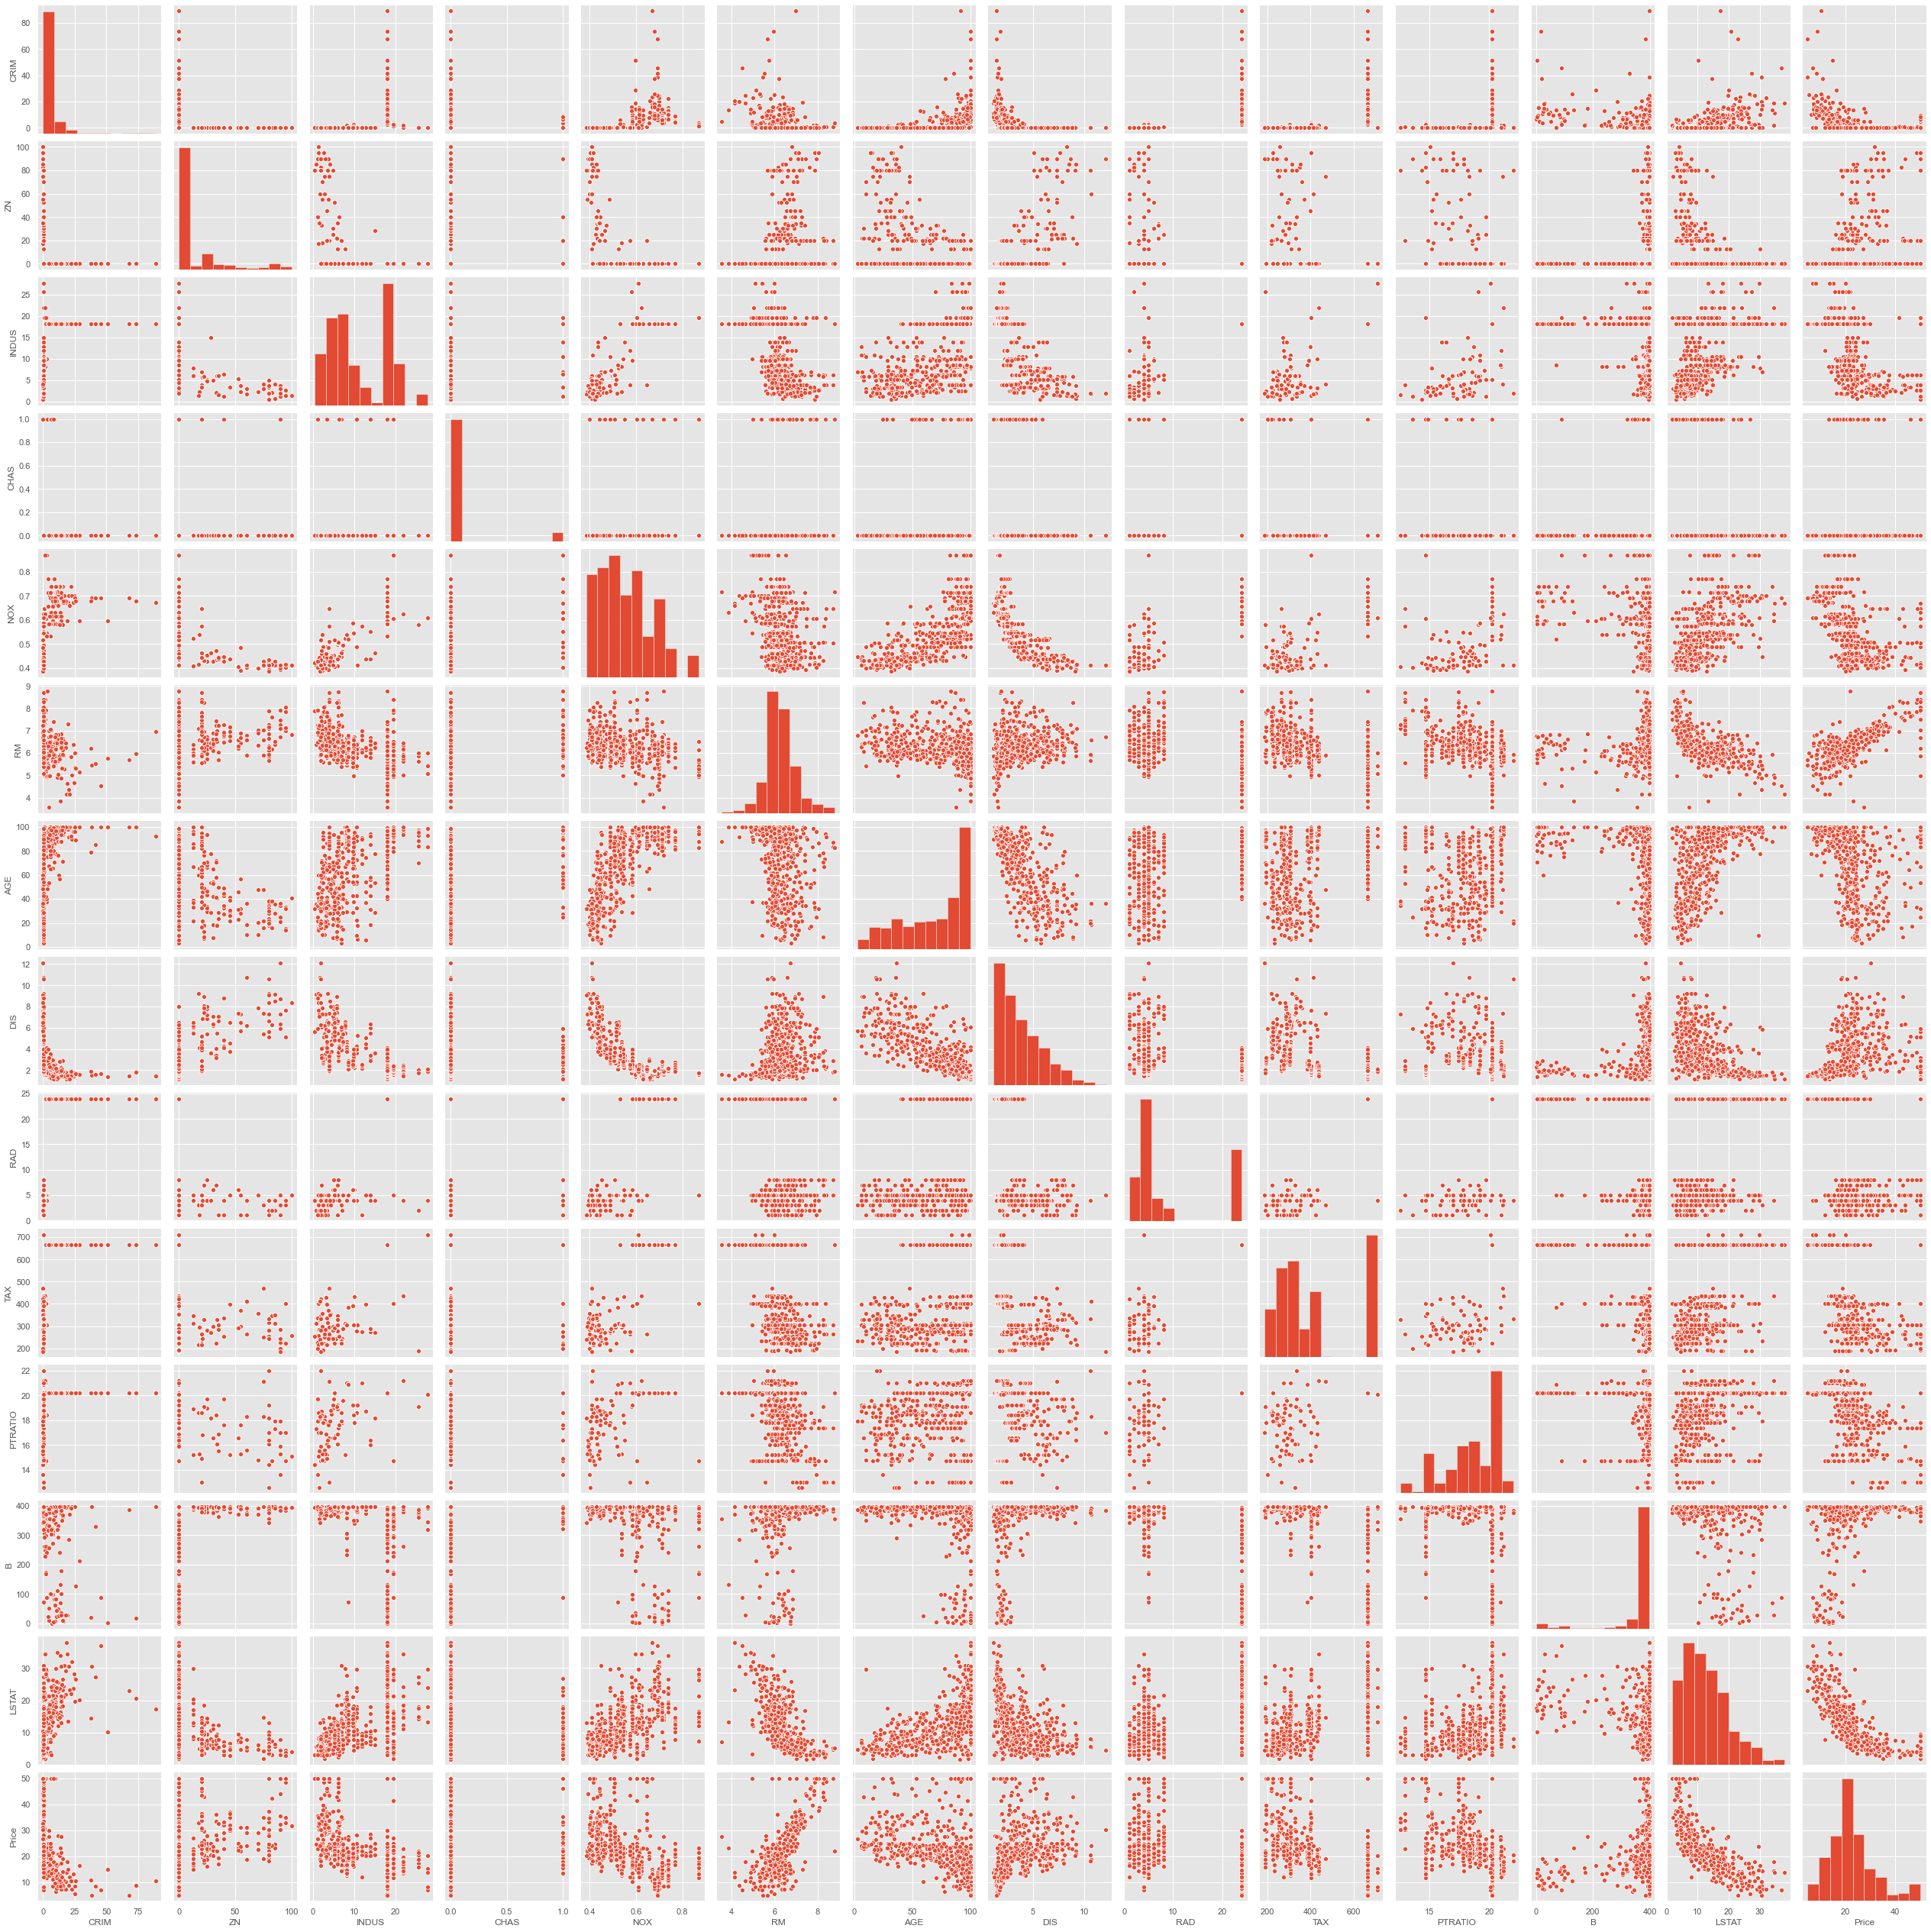

In [19]:
sns.pairplot(data);

## Distribution Plot

C:\Users\Vishal Sinha\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


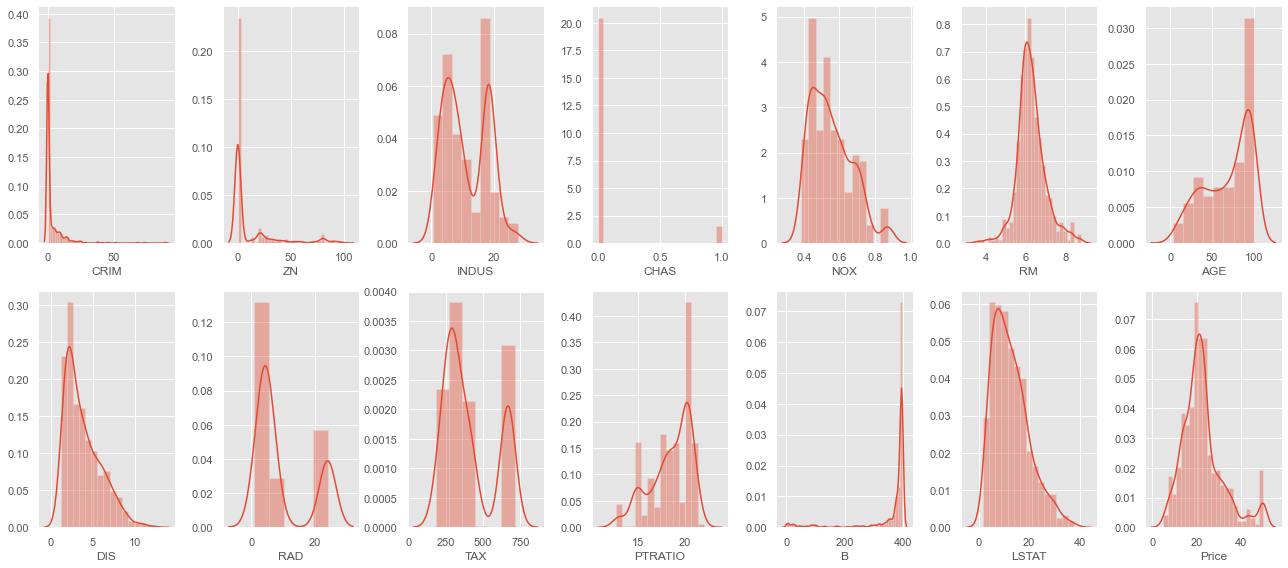

In [20]:
rows = 2
cols = 7
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(18,8))
col = data.columns
index=0

for i in range(rows):
    for j in range(cols):
        sns.distplot(data[col[index]], ax = ax[i][j])
        index = index+1

plt.tight_layout();

From the above distribution plots of the all the features we can infer the following:

- CRIM variable is left skewed which means the crime rate is very low.
- Zn variable is also left skewed which infers that there is very high distribution when Zn is low.
- INDUS variable is bi-modal which means it shows high distribution for some low values and some high values of INDUS.
- CHAS is also bi-modal which shows high distribution when Charles River did not tract bound the house and low distribution when otherwise.
- NOX variable is somewhat uniformly distributed.
- RM variable i.e., average number of rooms per dwelling is uniformly distributed.
- AGE variable is litlle bit right skewed and shows that majority of the people are in the age group of 50 - 80 years old.
- DIS variable is also somewhat uniformly distributed.
- RAD variable is bi-modal which means there were high distribution when RAD value was low and decent distribution when RAD value was high.
- TAX variable is also bi-modal which implies that distribution was high when tax was low and the same goes for when tax was high.
- PTRATIO variable is somewhat left skewed which shows that distribution was high when PTRatio was high.
- The 'B' variable is left skewed which shows high distribution when proportion of Blacks by town was high.
- LSTAT is somewhat normally distributed and had the highest count for the range of 0 to 20%.
- The 'Price' variable which is our target variable is normally distributed hence we don't have to take log values of our target variable.

## Plotting Price With Remaining Attributes

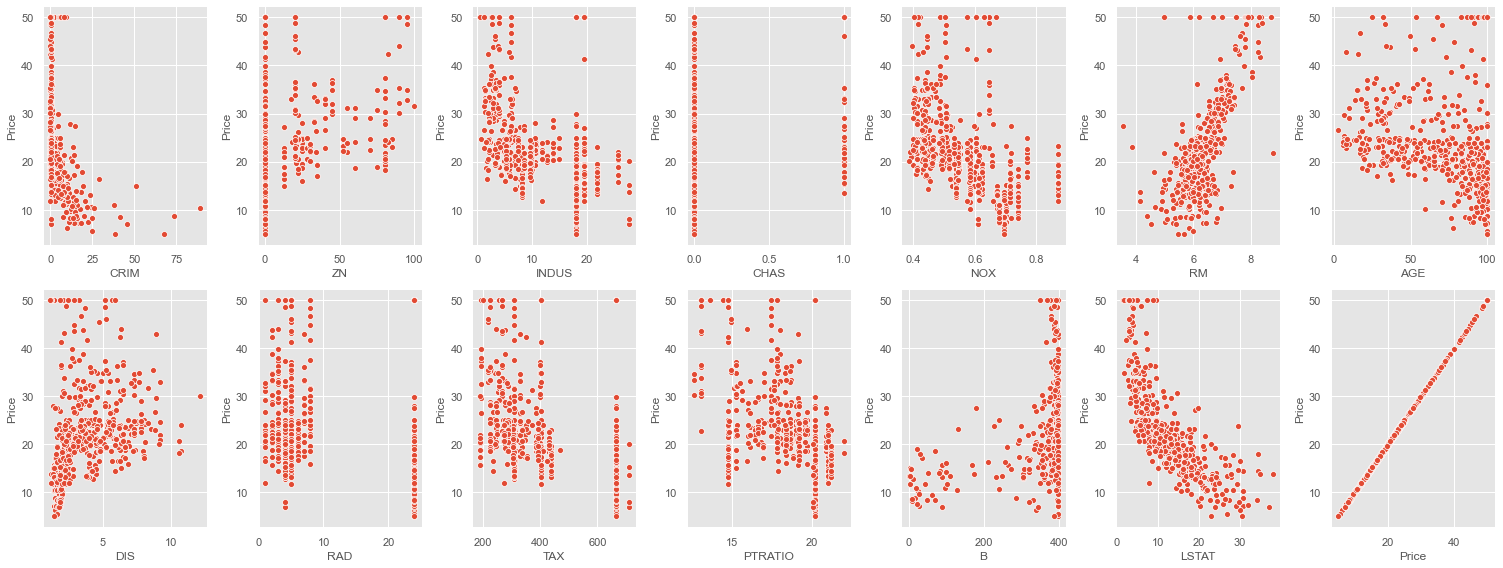

In [21]:
rows = 2
cols = 7

fig,ax = plt.subplots(rows,cols,figsize=(21,8))

col = data.columns
index = 0

for i in range(rows):
    for j in range(cols):
        sns.scatterplot(x = col[index], y = 'Price', data=data, ax=ax[i][j])
        index = index + 1
plt.tight_layout()

From the scatter plots we can observe the following:

- High crime rate leads to decrease in price of the houses.
- The proportion of land zoned has a psoitive correlation with price but it has a very effect on it.
- As the value of INDUS increases the price of the house decreases i.e., they have negative correlation.
- CHAS has no significant effect on the prices of the house.
- NOX has a negative effect on the prices as the value of NOX increases the prices tend to decrease.
- The average no of rooms have a strong positive effect on the prices as the no of rooms in a house increase the prices tend to get higher.
- The age of the house has a very low negative effect on the prices as older houses cost less as compared to newly built houses.
- DIS has a positive connection with the prices but it is not that strong and hardly impacts the prices.
- As RAD values increases the prices drop a bit.
- Houses with higher price tend to have lower tax as compared to houses with low prices.
- As the pupil-to-teacher ratio of a town increases the prices drop significantly.
- The proportion of Blacks by town have a little but not so significant effect on the prices.
- As the % of Lower status of the population increases the prices drop significantly.

## Correlation Matrix

In [22]:
corrmat = data.corr()

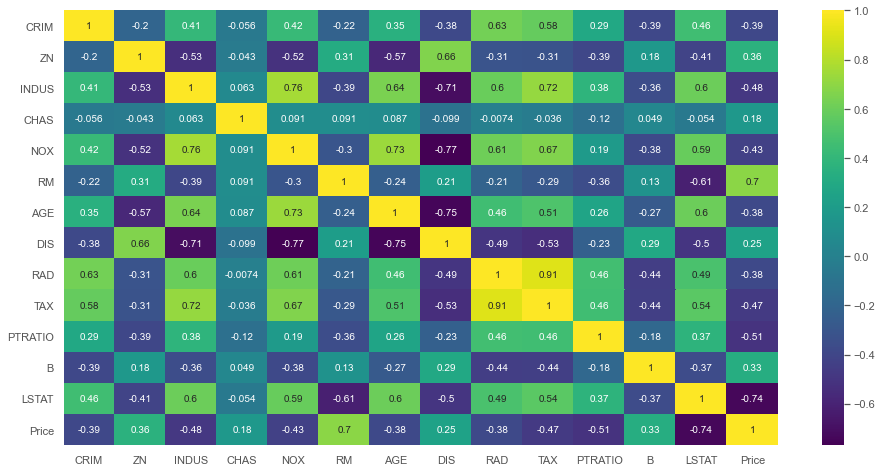

In [23]:
plt.figure(figsize=(16,8))
sns.heatmap(corrmat, annot = True, cmap='viridis');

From the above correlation heatmap we can infer the following observations:

- The prices of the houses in Boston are majorly affected by LSTAT, PTRATIO, TAX, Average Number of Rooms and the proportion of non-retail business acres per town.
- Since Tax and Rad have a very high correlation so one of them have to be dropped and since Price has a low correlation with Rad, we will drop the RAD variable for the purpose of building our Machine Learning Algorithm.
- Rest of the other variables have hardly any impact on the prices of the houses, so we will have to drop those insignificant attributes.

## Feature Engineering

In [24]:
# Correlated feature selection
def getcorrfeat(corrdata,threshold):
    feature = []
    value = []
    for i, index in enumerate(corrdata.index):
        if abs(corrdata[index]) > threshold:
            feature.append(index)
            value.append(corrdata[index])
    df = pd.DataFrame(data = value, columns = ['Correaltion Value'], index = feature)
    return df

In [25]:
threshold = 0.5
corr_df = getcorrfeat(corrmat['Price'], threshold)

In [26]:
corr_df

,Correaltion Value
RM,0.695360
PTRATIO,-0.507787
LSTAT,-0.737663
Price,1.000000


In [27]:
corr_data = data[corr_df.index]

In [28]:
corr_data.head()

,RM,PTRATIO,LSTAT,Price
0,6.575,15.3,4.98,24.0
1,6.421,17.8,9.14,21.6
2,7.185,17.8,4.03,34.7
3,6.998,18.7,2.94,33.4
4,7.147,18.7,5.33,36.2


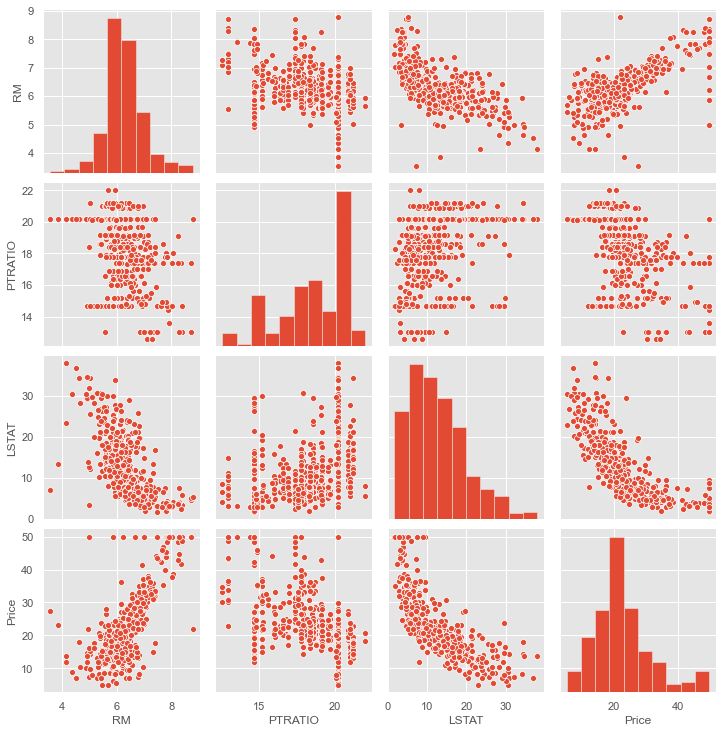

In [29]:
sns.pairplot(corr_data);

## Box Plot & Regression Plots

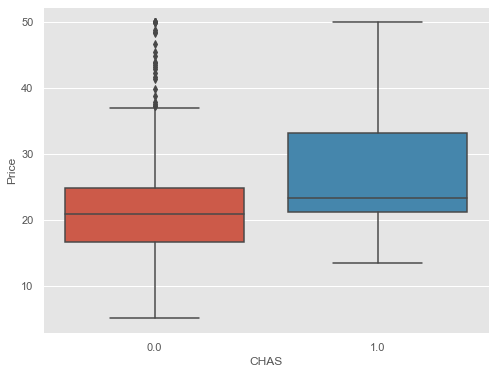

In [30]:
# Box Plot of CHAS variable against Price
plt.figure(figsize = (8,6))
sns.boxplot(x='CHAS', y = 'Price', data = data);

From the above box plot we can infer that the price of the houses were high if it tract bounds the Charles River.

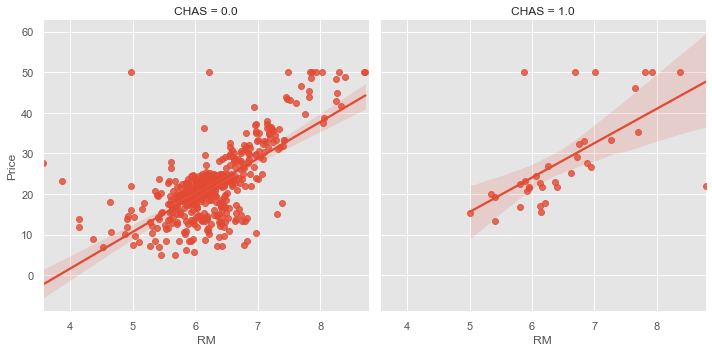

In [31]:
# Regression plot of Average number of rooms and price
sns.lmplot(x='RM', y='Price', data = data, col='CHAS');

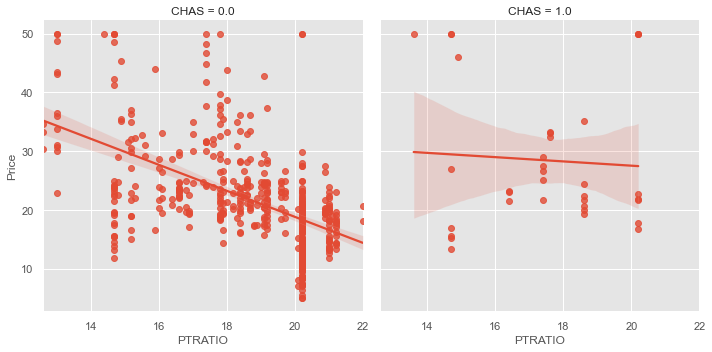

In [32]:
# Regression plot of pupil-to-teacher ratio and price
sns.lmplot(x='PTRATIO', y='Price', data = data, col='CHAS');

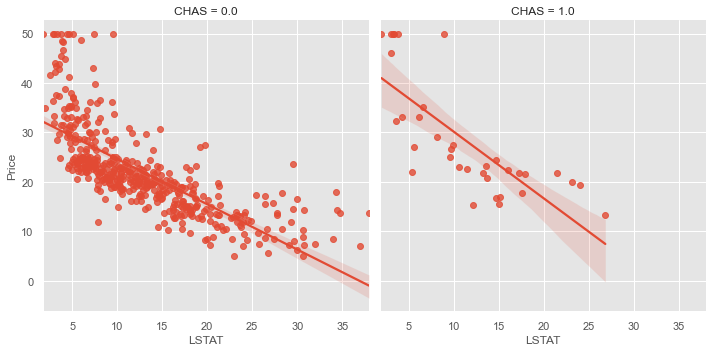

In [33]:
# Regression plot of LSTAT% and price
sns.lmplot(x='LSTAT', y='Price', data = data, col='CHAS');

## Density Plots

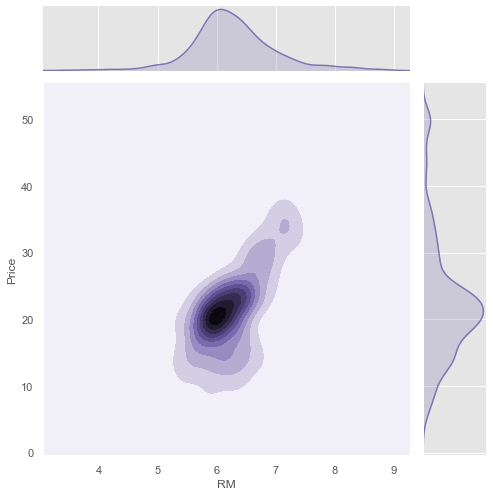

In [34]:
# Average number of rooms vs Price
sns.jointplot(x='RM', y='Price', data=data, kind='kde', color='m',height = 7);

From the above density plot we can infer that most of the houses had an average of 6 rooms at an average price of $22,000

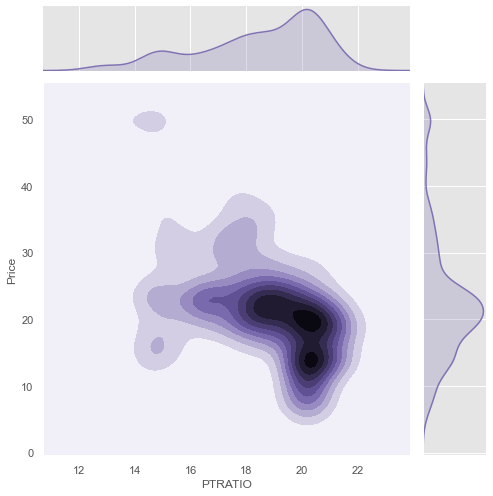

In [35]:
# Pupil-to-teacher vs Price
sns.jointplot(x='PTRATIO', y='Price', data=data, kind='kde', color='m',height = 7);

From the above density plot we can infer that the density of PTRatio was higher at around the mark of 20 and the price at which the density was highest is almost $22,000.

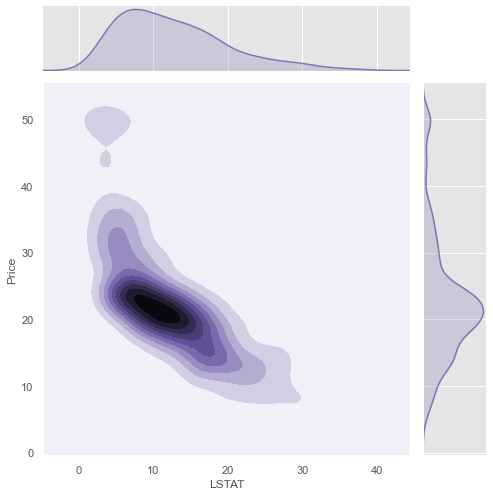

In [36]:
# LSTAT vs Price
sns.jointplot(x='LSTAT', y='Price', data=data, kind='kde', color='m',height = 7);

## Data Modelling

In [37]:
train = corr_data

In [38]:
train.head()

,RM,PTRATIO,LSTAT,Price
0,6.575,15.3,4.98,24.0
1,6.421,17.8,9.14,21.6
2,7.185,17.8,4.03,34.7
3,6.998,18.7,2.94,33.4
4,7.147,18.7,5.33,36.2


In [39]:
X = train.drop('Price', axis=1)
y = train['Price']

### splitting the data into training and validation data

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.3, random_state=42)

_________________

## Linear Regression

### Training the model

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
# Creating a linear regressor
lm = LinearRegression()

In [44]:
# Training the model using train data
lm.fit(X_train,y_train)

LinearRegression()

In [45]:
# Value of y intercept
lm.intercept_

18.119085045191962

In [46]:
coefficients = pd.DataFrame(lm.coef_, X.columns, columns = ['Coefficients'] )
coefficients

,Coefficients
RM,4.461626
PTRATIO,-0.862905
LSTAT,-0.608150


### Model Evaluation

#### For train data

In [47]:
# Predictions
y_pred = lm.predict(X_train)

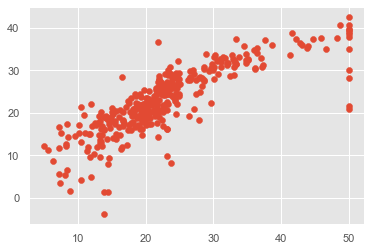

In [48]:
# scatter plot of y_pred vs y_train
plt.scatter(y_train,y_pred);

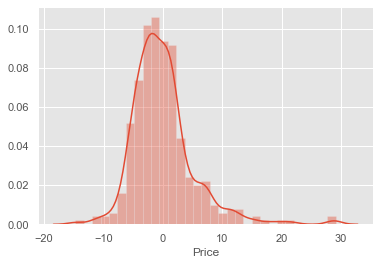

In [49]:
# Distribution of the residuals
sns.distplot(y_train - y_pred);

Here the residuals are normally distributed. So normality assumption is satisfied

In [50]:
# Evaluating the regression
from sklearn import metrics
print('R-squared: ', metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE: ',metrics.mean_absolute_error(y_train, y_pred))
print('MSE: ',metrics.mean_squared_error(y_train, y_pred))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R-squared:  0.6850018441906278
Adjusted R^2: 0.682301859997976
MAE:  3.6950990395279786
MSE:  27.687244667341563
RMSE:  5.261867032464956


𝑅^2 : It is a measure of the linear relationship between X and Y. It is interpreted as the proportion of the variance in the dependent variable that is predictable from the independent variable.

Adjusted 𝑅^2 :The adjusted R-squared compares the explanatory power of regression models that contain different numbers of predictors.

MAE : It is the mean of the absolute value of the errors. It measures the difference between two continuous variables, here actual and predicted values of y. 

MSE: The mean square error (MSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value. 

RMSE: The mean square error (MSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value. 

#### For validation data

In [51]:
# predictions
predictions = lm.predict(X_val)

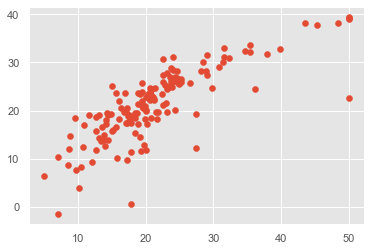

In [52]:
# scatter plot of y_val vs predictions
plt.scatter(y_val, predictions);

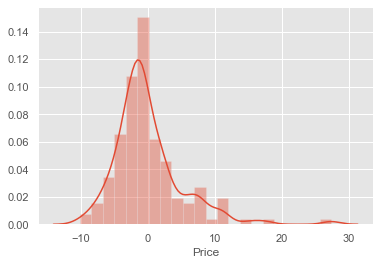

In [53]:
# Distribution of residuals
sns.distplot(y_val - predictions);

In [54]:
from sklearn import metrics
r2_linreg = metrics.r2_score(y_val, predictions)
print('R-squared: ', r2_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_val, predictions))*(len(y_val)-1)/(len(y_val)-X_val.shape[1]-1))
print('MAE: ',metrics.mean_absolute_error(y_val, predictions))
print('MSE: ',metrics.mean_squared_error(y_val, predictions))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_val, predictions)))

R-squared:  0.650904156861472
Adjusted R^2: 0.6438278897708261
MAE:  3.5911786565829553
MSE:  26.01221192212625
RMSE:  5.100216850500207


Here the validation evaluations scores are almost matching with that of train data. So our model is not overfitting.

______________________

## Random Forest Regressor

### Training the model

In [55]:
from sklearn.ensemble import RandomForestRegressor

In [56]:
# Creating an instance of the regressor
reg = RandomForestRegressor()

In [57]:
# Training the mode
reg.fit(X_train,y_train)

RandomForestRegressor()

### Model evaluation

#### For training data

In [58]:
# Prediction on train data
y_pred = reg.predict(X_train)

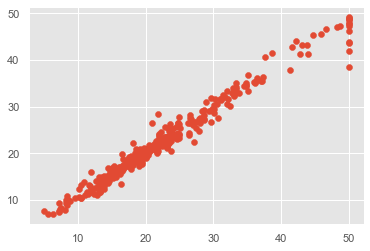

In [59]:
# Scatter plot of y_train vs y_pred
plt.scatter(y_train, y_pred)

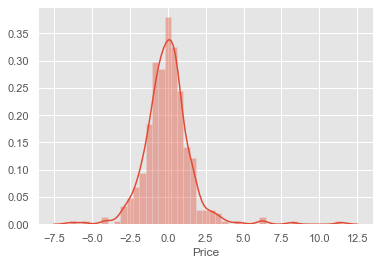

In [60]:
# Distribution of the residuals
sns.distplot(y_train - y_pred);

In [61]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.9709285780326999
Adjusted R^2: 0.9706793944158374
MAE: 1.0677457627118625
MSE: 2.5552770960451956
RMSE: 1.5985234111658158


#### For validation data

In [62]:
pred = reg.predict(X_val)

In [63]:
# Model Evaluation
r2_rf = metrics.r2_score(y_val, pred)
print('R^2:', r2_rf)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_val, pred))*(len(y_val)-1)/(len(y_val)-X_val.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_val, pred))
print('MSE:',metrics.mean_squared_error(y_val, pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_val, pred)))

R^2: 0.7720937092431372
Adjusted R^2: 0.7674739871332008
MAE: 2.644302631578948
MSE: 16.982003223684206
RMSE: 4.120922618017015


__________________

## SVM Regressor


In [64]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)

### Train the model

In [65]:
# Import SVM Regressor
from sklearn import svm

# Create a SVM Regressor
reg = svm.SVR()


In [66]:
# Train the model using the training sets 
reg.fit(X_train, y_train)

SVR()

### Model Evaluation

In [67]:
# Model prediction on train data
y_pred = reg.predict(X_train)

In [68]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.7317578840988652
Adjusted R^2: 0.7294586659625698
MAE: 3.015464378849843
MSE: 23.577551030281747
RMSE: 4.855672047233189


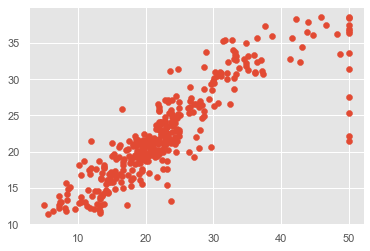

In [69]:
#scatter plot of y_train vs y_pred
plt.scatter(y_train, y_pred)

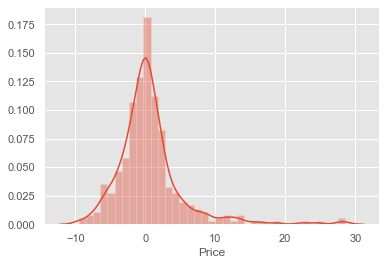

In [70]:
# Distribution of the residuals
sns.distplot(y_train - y_pred);

### For validation data

In [71]:
# Predicting Test data with the model
y_val_pred = reg.predict(X_val)

In [72]:
r2_svm = metrics.r2_score(y_val, y_val_pred)
print('R^2:', r2_svm)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_val, y_val_pred))*(len(y_val)-1)/(len(y_val)-X_val.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_val, y_val_pred))
print('MSE:',metrics.mean_squared_error(y_val, y_val_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_val, y_val_pred)))

R^2: 0.7182859727998323
Adjusted R^2: 0.7125755533295586
MAE: 2.930499030611594
MSE: 20.99138423157479
RMSE: 4.5816355411113605


_____________

## Evaluation and comparision of all the models

In [73]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Support Vector Machines'], 'R-squared Score': [r2_linreg*100, r2_rf*100, r2_svm*100]})

In [74]:
models

,Model,R-squared Score
0,Linear Regression,65.090416
1,Random Forest,77.209371
2,Support Vector Machines,71.828597


Hence, Random Forest works the best for this dataset.